# mom6_bathy Notebook Gallery
## Spherical grid with custom bathymetry and ridges

In this notebook, we create a spherical grid with uniform resolution. We then implement a user-defined, custom bathymetry including ridges.

## 1. Import Modules

In [1]:
%%capture
import numpy as np
from mom6_bathy.grid import Grid
from mom6_bathy.topo import Topo

## 2. Create a horizontal MOM6 grid

Spherical grid. x coordinates interval= [0, 360] degrees. y coordinates interval = [-80,+80] degrees

In [2]:
# Instantiate a MOM6 grid instance
grid = Grid(
    nx         = 180,         # Number of grid points in x direction
    ny         = 80,          # Number of grid points in y direction
    lenx       = 360.0,       # grid length in x direction, e.g., 360.0 (degrees)
    leny       = 160,         # grid length in y direction
    cyclic_x   = True,      # reentrant, spherical domain
    ystart     = -80          # start/end 10 degrees above/below poles to avoid singularity 
)

## 3. Configure the bathymetry

In [3]:
# Instantiate a Topo object associated with the horizontal grid object (grid).
topo = Topo(grid, min_depth=10.0)

### *Define a custom bathymetry*

In [4]:
# Define a sinusoidal depth array:
i = grid.tlat.nx.data                # array of x-indices
j = grid.tlat.ny.data[:,np.newaxis]  # array of y-indices 
custom_depth = 400.0 + 80.0 * np.sin(i*np.pi/6.) * np.cos(j*np.pi/6.)
topo.depth = custom_depth

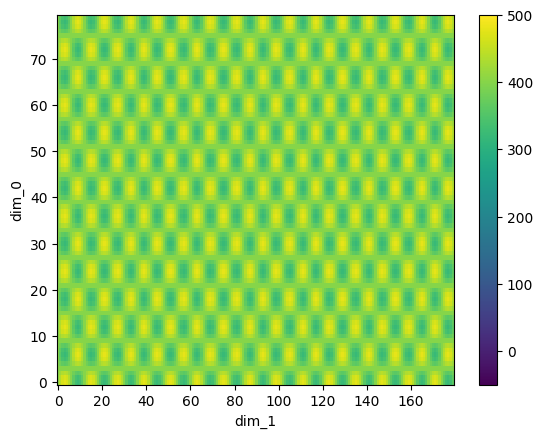

In [5]:
topo.depth.plot(vmin=-50, vmax=500)

### *Apply ridges*

In [6]:
# apply a submerged ridge ( height of 300 m):
topo.apply_ridge(height=400.0, width=4.0, lon=100, ilat=(10,70) )

In [7]:
# apply a ridge reaching above MSL ( height of 600 m):
topo.apply_ridge(height=600.0, width=16.0, lon=240, ilat=(10,70) )

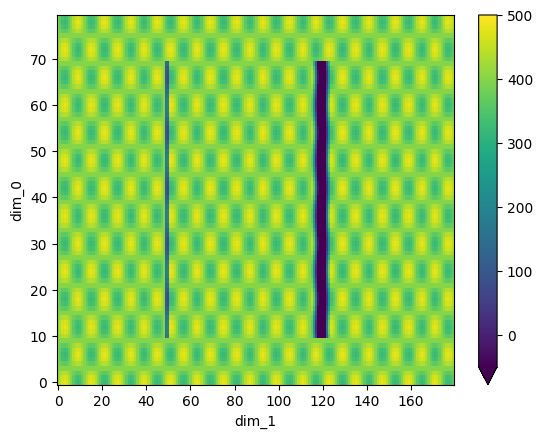

In [8]:
topo.depth.plot(vmin=-50, vmax=500)

### *Plot the ocean mask:*

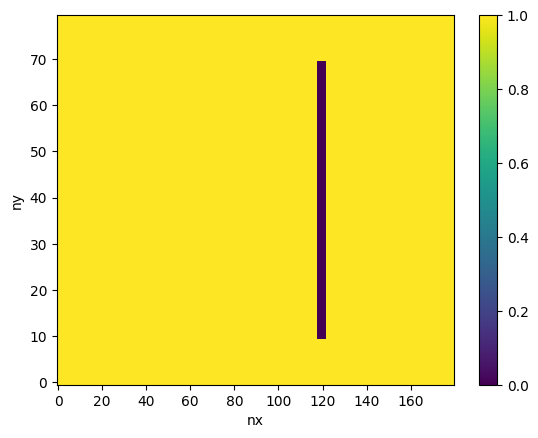

In [9]:
topo.tmask.plot()

## 4. Save the grid and bathymetry files

In [10]:
# MOM6 supergrid file:
grid.write_supergrid("./ocean_hgrid_3.nc")

# MOM6 topography file:
topo.write_topo("./ocean_topog_3.nc")

# CICE grid file:
topo.write_cice_grid("./cice_grid_3.nc")

# ESMF mesh file:
topo.write_esmf_mesh("./ESMF_mesh_3.nc")